In [54]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


digits = datasets.load_digits()
#Display an image for debugging
def display_image(n):
    # Display the image with the target (digit) displayed above
    image = digits.images[n]
    target = digits.target[n]
    plt.figure(figsize = (1,1))
    plt.imshow(image, cmap='gray')
    plt.title(f'Target: {target}')
    plt.axis('off')
    plt.show()

#Your code here - write an SVC to classify the digits dataset!

In [47]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['targer'] = digits.target
# display(df)
X = digits.data
y = digits.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=5)

In [52]:


params_tuning = GridSearchCV(SVC(random_state=15), {
        'C': [10, 50, 100],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto'],
        'class_weight': [None, 'balanced'],
        'decision_function_shape': ['ovo', 'ovr']
    }, cv=5, return_train_score=False)

params_tuning.fit(X_train,y_train)
result = params_tuning.cv_results_

df = pd.DataFrame(result)

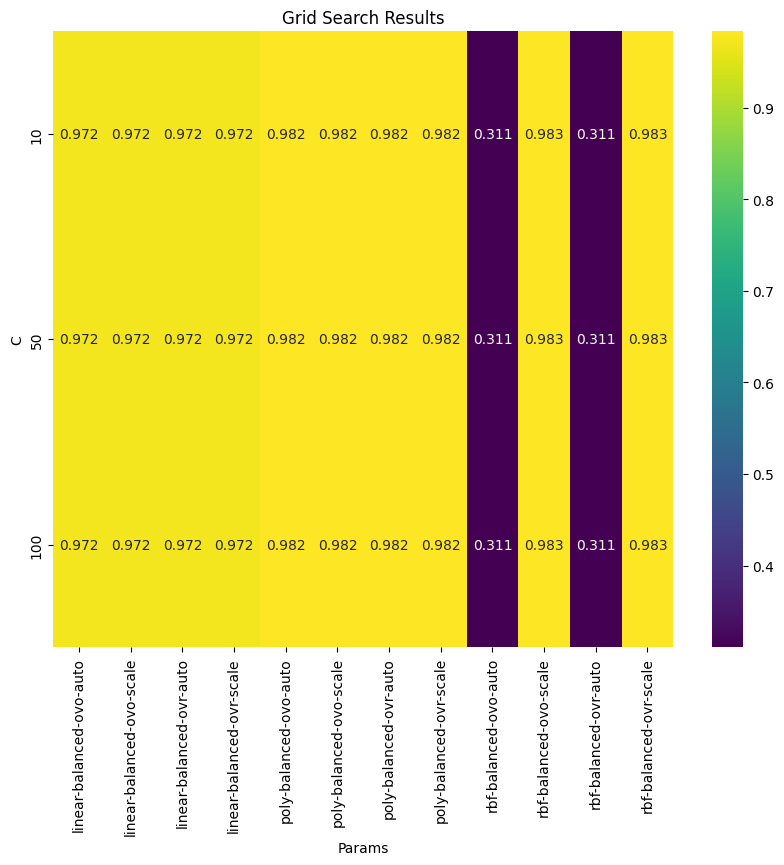

In [53]:
heatmap_data = df.pivot_table(index='param_C', 
                              columns=['param_kernel', 'param_class_weight', 'param_decision_function_shape', 'param_gamma'], 
                              values='mean_test_score')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', cbar=True)
plt.title('Grid Search Results')
plt.xlabel('Params')
plt.ylabel('C')
plt.show()

In [51]:
# C_values = df['param_C'].unique()
# kernel_values = df['param_kernel'].unique()
# gamma_values = df['param_gamma'].unique()

# # Create a grouped bar chart
# bar_width = 0.2
# index = np.arange(len(C_values))

# fig, ax = plt.subplots(figsize=(12, 8))

# for i, gamma_value in enumerate(gamma_values):
#     subset_df = df[df['param_gamma'] == gamma_value]
#     mean_scores = subset_df.groupby(['param_C', 'param_kernel'])['mean_test_score'].mean().values
#     ax.bar(index + i * bar_width, mean_scores, bar_width, label=f'Gamma: {gamma_value}')

# ax.set_xlabel('C and Kernel')
# ax.set_ylabel('Mean Test Score')
# ax.set_title('Grid Search Results')
# ax.set_xticks(index + (len(gamma_values) - 1) * bar_width / 2)
# ax.set_xticklabels([f'C: {C}, Kernel: {kernel}' for C in C_values for kernel in kernel_values])
# ax.legend(title='Gamma')

# plt.show()